In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Table of Contents
* [Lecture 2A - Introduction to working with data using Python Pandas*](#Lecture-2A---Introduction-to-working-with-data-using-Python-Pandas*)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
	* [Pandas Data Structures](#Pandas-Data-Structures)
		* [Series - Univariate Data](#Series---Univariate-Data)
		* [Selecting values based on index](#Selecting-values-based-on-index)
		* [Basic plotting](#Basic-plotting)
		* [Selecting data points based on values](#Selecting-data-points-based-on-values)
		* [Indices and alignment](#Indices-and-alignment)
	* [File input](#File-input)


# Lecture 2A - Introduction to working with data using Python Pandas*


---

### Content

1. Why pandas...
2. pandas' Series data structure
3. Selecting and filtering data from Series
4. Basic plotting with Series
5. Series indices and alignment
6. Open files and load file data into Series

\* This notebook material is adapted from Assoc. Prof. Fonnesbeck's tutorial on statistical data analysis in Python and closely follows "Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython" By Wes McKinney.

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the reasons for using the Series data type  
* select data from Series using the index 
* filter data points from Series using their values 
* perform plotting of Series data at an introductory level
* explain the role of indices in Series and how operations on multiple Series objects use indices
* load univariate data into a Series object from a flat file


**pandas** is a package that is a fundamental ingredient in enabling working with structured data in a fast, easy and expressive manner using Python. It provides powerful data structures with all the key manipulation operations enabling, slicing and dicing, aggregating, integrating and extracting data. Pandas is particularly designed and well suited for working with **two dimensional data** that is arranged as SQL tables or Excel spreadsheets, where the data can of **different types**.

Pandas key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, JSON, CSV, XML formats
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [3]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

C:\Users\chang\anaconda3\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.__version__

'1.4.4'

In [6]:
#import some extra plotting libraries that pretty-fy the plots 
import seaborn as sns
from pylab import rcParams

rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [7]:
#this line enables the plots to be embedded into the notebook
%matplotlib inline

In [8]:
# Set some Pandas options for displaying the data as you like
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 20)

## Pandas Data Structures

The real power of pandas lies in its data structures. The two structures we will look at are the Series and DataFrame, where the DataFrame is the key and the most powerful in the pandas suite.

### Series - Univariate Data

A **Series** is a single vector of data (like a list or array) with an *index* that labels each element in the vector. Series holds univariate data which represents multiple observations of some phenomenon, viewed from a single perspective (one variable).

In [9]:
type([3778000, 19138000, 20000, 447000])

list

In [10]:
#by calling the Series class and placing a list inside its parentheses, we create a series object
my_series = pd.Series([3778000, 19138000, 20000, 447000])
my_series

0     3778000
1    19138000
2       20000
3      447000
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index seen above.

We can extract all the values in a series object. 

In [11]:
my_series.values

array([ 3778000, 19138000,    20000,   447000], dtype=int64)

Meanwhile, individual values can be accessed like in a list:

In [12]:
my_series[1]

19138000

The entire index of a series object can also be extracted.

In [13]:
my_series.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
list(my_series.index)

[0, 1, 2, 3]

We can assign meaningful labels to the index, if they are available:

In [15]:
country = pd.Series(
                    data = [3778000, 19138000, 20000, 447000], 
                    index=['New Zealand', 'Australia', 'Cook Islands', 'Solomon Islands']
                    )
country

New Zealand         3778000
Australia          19138000
Cook Islands          20000
Solomon Islands      447000
dtype: int64

<AxesSubplot:>

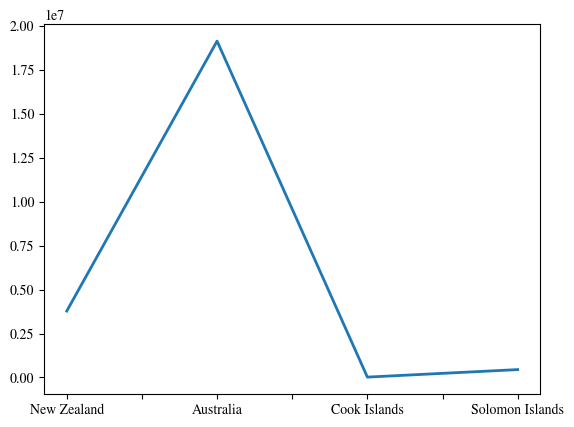

In [16]:
rcParams['figure.dpi'] = 100
country.plot()

### Selecting values based on index

In [17]:
country.dtypes

dtype('int64')

The new index values we created can now be used to refer to the values in the series object.

In [17]:
country['Australia']

19138000

In order to access multiple values, we pass a **list** of index values:

In [18]:
country[ ['New Zealand', 'Australia'] ]

New Zealand     3778000
Australia      19138000
dtype: int64

**Exercise**: Display the values for 'Australia', 'Cook Islands' and the 'Solomon Islands' using the above method.

In [20]:
country[['Australia','Cook Islands','Solomon Islands']]

Australia          19138000
Cook Islands          20000
Solomon Islands      447000
dtype: int64

However, we do not have to use full index name to access the values, instead we can still use positional index values

In [21]:
country[ [0, 1] ]

New Zealand     3778000
Australia      19138000
dtype: int64

We can also use slicing and avoid explicitly typing in the names or indexes of values we need to extract.

In [22]:
country[ country.index[0:2] ]
# or
# country.iloc[0:2]

New Zealand     3778000
Australia      19138000
dtype: int64

**Exercise**: Display the values for 'Australia', 'Cook Islands' and the 'Solomon Islands' using slicing.

In [32]:
country[  country.index[1:4]]

Australia          19138000
Cook Islands          20000
Solomon Islands      447000
dtype: int64

In [33]:
country.iloc[1:]

Australia          19138000
Cook Islands          20000
Solomon Islands      447000
dtype: int64

Additionally, we pass a list of booleans in order to print certain values 

In [34]:
country[ [False, False, True, True] ]

Cook Islands        20000
Solomon Islands    447000
dtype: int64

This becomes handy when the values we wish to extract, depend on some boolean operation that we need to perform.

In [35]:
list_of_values = []
for val in country.index:
    if 'Islands' in val:
        list_of_values.append(True)
    else:
        list_of_values.append(False)

print(list_of_values)
country[ list_of_values ]

[False, False, True, True]


Cook Islands        20000
Solomon Islands    447000
dtype: int64

There are almost always more ways than one way of coding for a particular requirement. The above can be shortened using functional programming constructs like list comprehension to the following:

In [37]:
['Islands' in name for name in country.index]

[False, False, True, True]

In [36]:
country[['Islands' in name for name in country.index]]

Cook Islands        20000
Solomon Islands    447000
dtype: int64

**Exercise**: Using the long form construct above, write code below to list the values for countries whose name is smaller than 12 characters. Hint: if using the list comprehension, use the 'if' keyword to define the condition.

In [39]:
list_of_values = []
for val in country.index:
    if len(val) < 12:
        list_of_values.append(True)
    else:
        list_of_values.append(False)

print(list_of_values)
country[ list_of_values ]

[True, True, False, False]


New Zealand     3778000
Australia      19138000
dtype: int64

**Exercise**: Try to replicate the same logic using list comprehension:

We can give both the array of values and the index meaningful labels themselves:

In [40]:
country.name = 'POPULATION'
country.index.name = 'NATION'
country

NATION
New Zealand         3778000
Australia          19138000
Cook Islands          20000
Solomon Islands      447000
Name: POPULATION, dtype: int64

Python's NumPy package adds support for large, multi-dimensional arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays. NumPy's math functions and other operations can be applied to Series objects at an element-wise level without losing the data structure.

In [42]:
#import numpy as np
np.sqrt(country)

NATION
New Zealand        1943.707797
Australia          4374.699990
Cook Islands        141.421356
Solomon Islands     668.580586
Name: POPULATION, dtype: float64

### Basic plotting

We can also plot the result of Numpy maths operations on the Series in an easy manner:

<AxesSubplot:xlabel='NATION'>

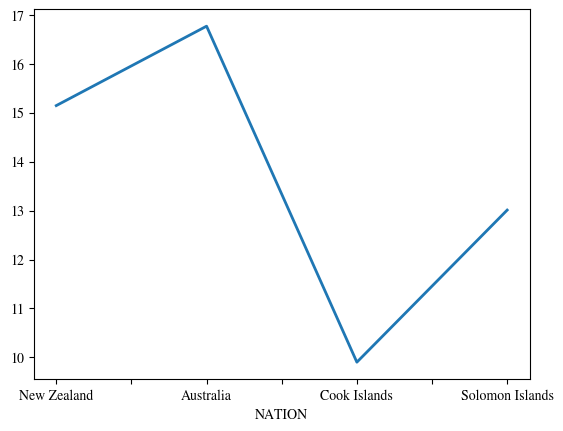

In [44]:
np.log(country).plot()

We can easily change to different types of graphs. The options for graphs are ‘line’, ‘bar’, ‘barh’, ‘kde’, ‘density’ and ‘scatter’

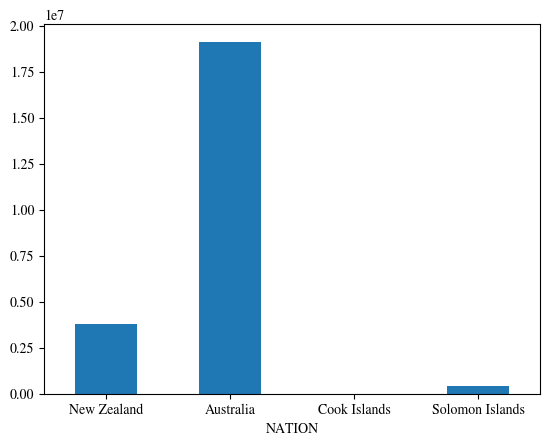

In [47]:
_ = country.plot(kind='bar',rot=0)

**Exercise**: Plot the country data using horizontal bar graphs (barh).

In [67]:
##Rot是字的旋转度

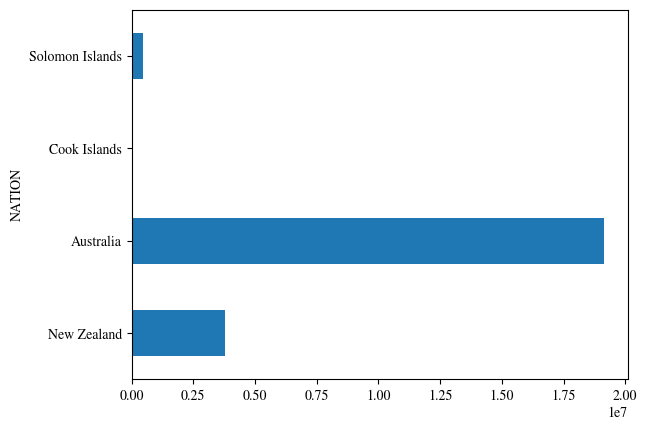

In [68]:
_ = country.plot(kind='barh')

### Selecting data points based on values

We can do filtering/selection based on an arbitrary number and more complex conditions as follows:

In [69]:
country <= 20000

NATION
New Zealand        False
Australia          False
Cook Islands        True
Solomon Islands    False
Name: POPULATION, dtype: bool

In [70]:
country[country <= 20000]

NATION
Cook Islands    20000
Name: POPULATION, dtype: int64

In [71]:
country[(country > 10000) & (country < 500000)]

NATION
Cook Islands        20000
Solomon Islands    447000
Name: POPULATION, dtype: int64

**Exercise**: plot a bar graph for countries with less than 1,000,000 population

In [72]:
(country < 1000000)

NATION
New Zealand        False
Australia          False
Cook Islands        True
Solomon Islands     True
Name: POPULATION, dtype: bool

<AxesSubplot:xlabel='NATION'>

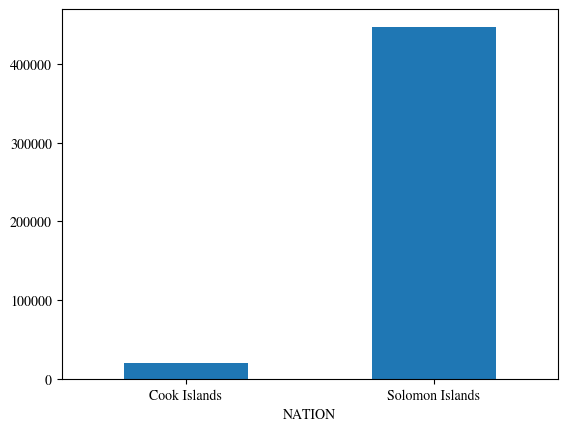

In [73]:
country[(country < 1000000)].plot(kind='bar',rot=0)

### Indices and alignment

A `Series` can be thought of as an ordered **key-value** data structure. In fact, we can create one from a `dict`:

In [74]:
country_dict = {'New Zealand': 3778000, 
                'Australia': 19138000, 
                'Cook Islands': 20000, 
                'Solomon Islands': 447000}
type(country_dict)

dict

In [75]:
pd.Series(country_dict)

New Zealand         3778000
Australia          19138000
Cook Islands          20000
Solomon Islands      447000
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corresponding values as **missing**. Pandas uses `NaN` (Not a Number) type for representing missing values.

In [76]:
country2 = pd.Series(country_dict, index=['Niue','New Zealand', 'Australia', 'Cook Islands'])
country2

Niue                   NaN
New Zealand      3778000.0
Australia       19138000.0
Cook Islands       20000.0
dtype: float64

We can find out which keys are associated with null values:

In [77]:
country2.isnull()

Niue             True
New Zealand     False
Australia       False
Cook Islands    False
dtype: bool

**Exercise**: plot a bar graph on country2 for countries that do not have null/NaN for population

<AxesSubplot:>

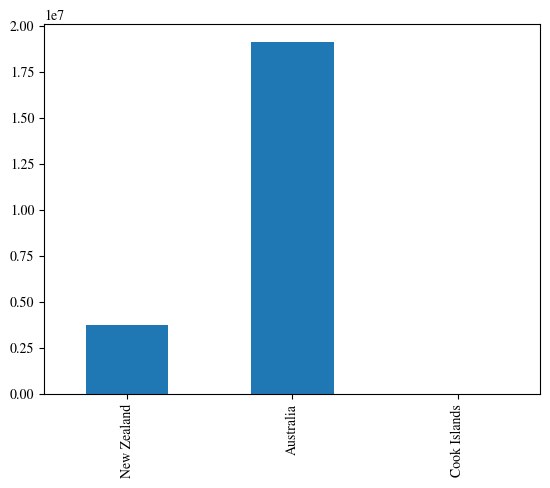

In [92]:
country2[country2.notnull()].plot(kind='bar')

In [ ]:
## ‘~’表示不等于

<AxesSubplot:>

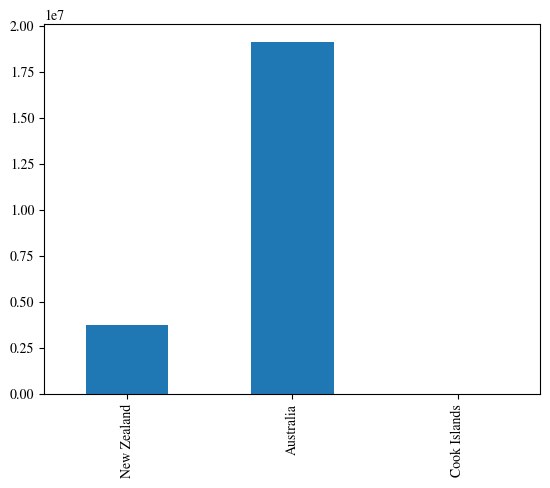

In [93]:
country2[~country2.isnull()].plot(kind='bar')

One of the great advantages of working with pandas data structures, comes in their ability to ensure alignment. Critically, the labels are used to **align data** when used in operations with other Series objects:

In [94]:
country

NATION
New Zealand         3778000
Australia          19138000
Cook Islands          20000
Solomon Islands      447000
Name: POPULATION, dtype: int64

In [95]:
country2

Niue                   NaN
New Zealand      3778000.0
Australia       19138000.0
Cook Islands       20000.0
dtype: float64

In [96]:
country + country2

Australia          38276000.0
Cook Islands          40000.0
New Zealand         7556000.0
Niue                      NaN
Solomon Islands           NaN
dtype: float64

This is in contrast  with conventional python NumPy arrays, where arrays of the same length will combine values **element-wise**; adding Series combined values with the **same label** in the resulting series. Notice also that the **missing values were propagated by addition**.

## File input

Up until this point, we have explored trivial datasets. Real-world datasets are much larger and are often stored in flat files that have to be opened and loaded into a program for processing. Below is an example of a file containing response times (in milliseconds) for queries against a web server or database, from the book "Data Analysis with Open Source Tools" by Philipp K. Janert.

The data can be opened and read using pandas pd.read_csv() function and then converted into a Series object as follows:

In [112]:
server_data = pd.read_csv("dataset/ch02_serverdata", header=None)[0]
server_data.head()

0     452.42
1     318.58
2     144.82
3     129.13
4    1216.45
Name: 0, dtype: float64

**Exercise**: From the output above, what is the first thing you can tell about the dataset that has been loaded?

In [115]:
type(server_data)

pandas.core.series.Series

**Exercise**: Call the *describe()* function on the server_data object in the cell below.

In [116]:
server_data.describe()

count    1000.000000
mean      849.188570
std       675.909154
min        44.500000
25%       347.265000
50%       630.940000
75%      1125.880000
max      2985.290000
Name: 0, dtype: float64